# Testing Trained Network

In [47]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from deep_model import DeepEncodeNetwork, GRU_Network, DeepDecodeNetwork
from mpl_toolkits import mplot3d
import binvox_rw;
import os
import random
import cv2
%matplotlib inline

## Actual Work

In [50]:
with open('chkpt_gru/final.pt', 'rb') as f: 
    loaded = torch.load(f, 'cuda')

In [51]:
encoder = DeepEncodeNetwork().cuda()
lstm = GRU_Network().cuda()
decoder = DeepDecodeNetwork().cuda()

encoder.load_state_dict(loaded['Encoder Params'])
lstm.load_state_dict(loaded['GRU Params'])
decoder.load_state_dict(loaded['Decoder Params'])

<All keys matched successfully>

In [52]:
with open('PlaneVoxels/103c9e43cdf6501c62b600da24e0965/model.binvox','rb') as f:
    m1 = binvox_rw.read_as_3d_array(f)

/tmp/ipykernel_2161/2053147884.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


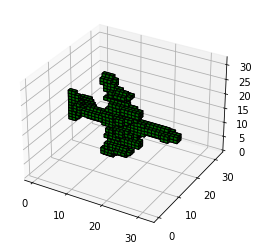

In [53]:
data = np.uint8(m1.data)
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Random data points between 0 and 1

# Create a new figure
fig = plt.figure()

# Axis with 3D projection
ax = fig.gca(projection='3d')

# Plot the voxels
ax.voxels(data, edgecolor="k", facecolors='green')

# Display the plot
plt.show()

In [54]:
xx,yy,zz = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]), np.arange(data.shape[2])) 
points = np.vstack((xx.flatten(),yy.flatten(),zz.flatten()))[:,(m1.data).flatten()].T
print(points.shape)

(606, 3)


In [56]:
def makeData(path,n):
    all_png = [path+i for i in os.listdir(path) if i.endswith('.png')]
    choices = random.sample(all_png,k=n)
    return choices
def makeLabel(path):
    with open(path+'/model.binvox','rb') as f:
        m1 = binvox_rw.read_as_3d_array(f)
    return m1.data

In [57]:
list_impaths = makeData('PlaneRenderings/103c9e43cdf6501c62b600da24e0965/rendering/',5)

h0 = torch.zeros((128, 4, 4, 4)).cuda()
list_im = []
for i in list_impaths:
    im = cv2.imread(i)
    list_im.append(im)
    im = cv2.resize(im, (127,127), interpolation=cv2.INTER_AREA)
    im.transpose(2,0,1)
    im = torch.tensor(np.rollaxis(im,2,start=0), device='cuda').reshape(1,3,127,127)
    im = im.float()
    h0 = lstm(encoder(im).cuda(),h0)
h0 = h0.reshape(1,128,4,4,4).cuda()
decoded = decoder(h0).cuda()

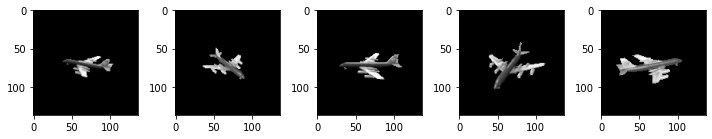

In [58]:
plt.figure(figsize=(10,10))
for i in range(len(list_im)):
    plt.subplot(1, len(list_im), i+1)
    plt.imshow(list_im[i])
plt.show()

/tmp/ipykernel_2161/3773481147.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


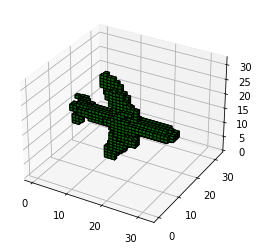

In [59]:
data = (decoded[0,0] < decoded[0,1]).cpu().detach().numpy()
# Set the figure size

# Random data points between 0 and 1

# Create a new figure
fig = plt.figure()

# Axis with 3D projection
ax = fig.gca(projection='3d')

# Plot the voxels
ax.voxels(data, edgecolor="k", facecolors='green')

# Display the plot
plt.show()

In [73]:
xx,yy,zz = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]), np.arange(data.shape[2])) 
points = np.vstack((xx.flatten(),yy.flatten(),zz.flatten()))[:,(data).flatten()].T
print(points.shape)
writeocc(points, 'grid_models/GRU/','ogPlane.ply')

(32768, 3)


In [74]:
list_impaths = makeData('PlaneRenderings/1e6a71e0cb436a88a3a1394d6e3d2c63/rendering/',5)

h0 = torch.zeros((128, 4, 4, 4)).cuda()
s0 = torch.zeros((128, 4, 4, 4)).cuda()
list_im = []
for i in list_impaths:
    im = cv2.imread(i)
    list_im.append(im)
    im = cv2.resize(im, (127,127), interpolation=cv2.INTER_AREA)
    im.transpose(2,0,1)
    im = torch.tensor(np.rollaxis(im,2,start=0), device='cuda').reshape(1,3,127,127)
    im = im.float()
    h0 = lstm(encoder(im).cuda(),h0)
h0 = h0.reshape(1,128,4,4,4).cuda()
decoded = decoder(h0).cuda()

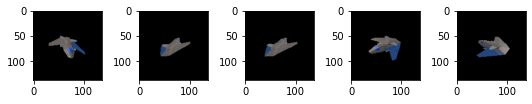

In [75]:
for i in range(len(list_im)):
    plt.subplot(1, len(list_im), i+1)
    plt.imshow(list_im[i])
plt.show()

/tmp/ipykernel_2161/3773481147.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


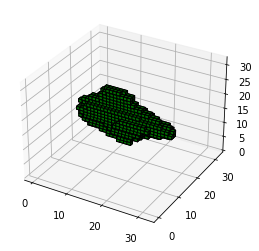

In [76]:
data = (decoded[0,0] < decoded[0,1]).cpu().detach().numpy()
# Set the figure size

# Random data points between 0 and 1

# Create a new figure
fig = plt.figure()

# Axis with 3D projection
ax = fig.gca(projection='3d')

# Plot the voxels
ax.voxels(data, edgecolor="k", facecolors='green')

# Display the plot
plt.show()

In [78]:
with open('PlaneVoxels/1e6a71e0cb436a88a3a1394d6e3d2c63/model.binvox','rb') as f:
    m1 = binvox_rw.read_as_3d_array(f)

/tmp/ipykernel_2161/2053147884.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


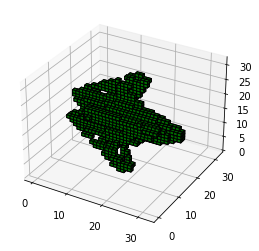

In [79]:
data = np.uint8(m1.data)
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Random data points between 0 and 1

# Create a new figure
fig = plt.figure()

# Axis with 3D projection
ax = fig.gca(projection='3d')

# Plot the voxels
ax.voxels(data, edgecolor="k", facecolors='green')

# Display the plot
plt.show()

In [84]:
list_impaths = makeData('PlaneRenderings/1a9b552befd6306cc8f2d5fe7449af61/rendering/',5)

h0 = torch.zeros((128, 4, 4, 4)).cuda()
s0 = torch.zeros((128, 4, 4, 4)).cuda()
list_im = []
for i in list_impaths:
    im = cv2.imread(i)
    list_im.append(im)
    im = cv2.resize(im, (127,127), interpolation=cv2.INTER_AREA)
    im.transpose(2,0,1)
    im = torch.tensor(np.rollaxis(im,2,start=0), device='cuda').reshape(1,3,127,127)
    im = im.float()
    h0 = lstm(encoder(im).cuda(),h0)
h0 = h0.reshape(1,128,4,4,4).cuda()
decoded = decoder(h0).cuda()

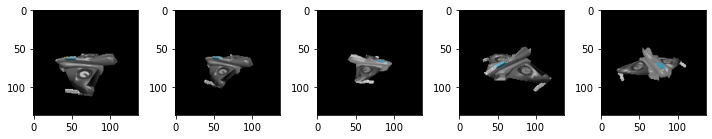

In [88]:
plt.figure(figsize=(10,10))
for i in range(len(list_im)):
    plt.subplot(1, len(list_im), i+1)
    plt.imshow(list_im[i])
plt.show()

/tmp/ipykernel_2161/3773481147.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


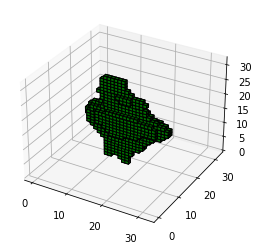

In [86]:
data = (decoded[0,0] < decoded[0,1]).cpu().detach().numpy()
# Set the figure size

# Random data points between 0 and 1

# Create a new figure
fig = plt.figure()

# Axis with 3D projection
ax = fig.gca(projection='3d')

# Plot the voxels
ax.voxels(data, edgecolor="k", facecolors='green')

# Display the plot
plt.show()

In [81]:
with open('PlaneVoxels/1a9b552befd6306cc8f2d5fe7449af61/model.binvox','rb') as f:
    m1 = binvox_rw.read_as_3d_array(f)

/tmp/ipykernel_2161/2053147884.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


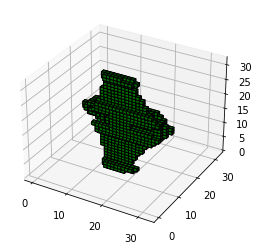

In [82]:
data = np.uint8(m1.data)
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Random data points between 0 and 1

# Create a new figure
fig = plt.figure()

# Axis with 3D projection
ax = fig.gca(projection='3d')

# Plot the voxels
ax.voxels(data, edgecolor="k", facecolors='green')

# Display the plot
plt.show()